<a href="https://colab.research.google.com/github/surbhiagrawal22/Tableau_Codes/blob/main/Standard_Car_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Resnet50 For Image Classification Task**

Step 1) Set the Runtime to GPU (Click on Runtime on top ribbon, select change Runtime option and then select GPU from dropdown. Click Save)

Step 2) Load and install the libraries

In [69]:
import numpy as np 
import pandas as pd 
import cv2
import random
import glob
import shutil
import os
import PIL
from PIL import Image 
import pathlib
import matplotlib.pyplot as plt
import tensorflow as tf
from pathlib import Path
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from google.colab import drive # Mounting google drive as the files are saved in the Google drive
drive.mount('/content/drive', force_remount=True) #https://stackoverflow.com/questions/49588113/google-colab-script-throws-transport-endpoint-is-not-connected
print(tf.__version__)

Mounted at /content/drive
2.7.0


Step 3) Create directory structure for the project should be as below :-



data/

-- data/train/

----> data/train/Acura Integra Type R 2001/

----> data/train/Acura TL Sedan 2012/

----> data/train/Aston Martin V8 Vantage Convertible 2012/






-- data/test/

----> data/test/Acura Integra Type R 2001/

----> data/test/Acura TL Sedan 2012/

----> data/test/Aston Martin V8 Vantage Convertible 2012/


Also we need to make sure that name should be same in both the train and test data



Source : https://www.mathworks.com/help/deeplearning/ref/resnet50.html



1.   ResNet-50 is a convolutional neural network (CNN) that is 50 layers deep. ResNet50 has 48 Convolution layers along with 1 MaxPool and 1 Average Pool layer.
2.   We can use a pretrained version of the network trained on more than a million images from the ImageNet database
3. We can use this knowledge gained by the ResNet-50 in training of similar tasks. This is alo called transfer learning.
Models that are pretrained for a similar problem can be used as a starting point for training new models. The pretrained models are referred to as base models.




Source https://keras.io/api/applications/resnet/

The Resnet50 network can take the input image having height, width as multiples of 32 and 3 as channel width (RGB Color Channel). 

A further important aspect to note is that the input must be of the same dimensionality as the data on which the model was trained on – if the first layers of the base model are not modified.
So we will set our IMG_WIDTH and IMG_HEIGHT as 224 * 224


In [70]:
IMG_WIDTH=224  # Since all images are of diffrent sizes, we will size them to all equal sizes
IMG_HEIGHT=224 # Setting the image width as global varibale (because we will not be training the first layers of Resnet)
IMG_DIM = (IMG_WIDTH, IMG_HEIGHT)
BATCH_SIZE = 30 
IMG_DIR = pathlib.Path(r'/content/drive/MyDrive/StanfordCarsDataset')   # Image folder directory Path
TRAIN_DIR = '/content/drive/MyDrive/StanfordCarsDataset/train'          # Path where our Train data is stored
# VALID_DIR=                                                              # Path where our Validation data is stored
TEST_DIR= '/content/drive/MyDrive/StanfordCarsDataset/test'             # Path where our Test data is stored

In [71]:
# List all the classes that we need to predict by looping through train directory
"""
#Class_labels=[]

rootdir = r'/content/gdrive/MyDrive/StanfordCarsDataset/train'
for path in Path(rootdir).iterdir():
    if path.is_dir():
        print(str(path).split("/")[-1])
       # Class_labels.append(str(path).split("/")[-1])
#Class_labels
"""
# List all the classes
train_classes = os.listdir(TRAIN_DIR)
for car_classes in train_classes:
  print(car_classes)

Volvo C30 Hatchback 2012
Volvo XC90 SUV 2007
Volvo 240 Sedan 1993
Toyota Corolla Sedan 2012
Volkswagen Beetle Hatchback 2012
Volkswagen Golf Hatchback 1991
Volkswagen Golf Hatchback 2012
Toyota Sequoia SUV 2012
Toyota Camry Sedan 2012
Toyota 4Runner SUV 2012
Suzuki SX4 Sedan 2012
Suzuki SX4 Hatchback 2012
Tesla Model S Sedan 2012
Suzuki Kizashi Sedan 2012
Spyker C8 Coupe 2009
Spyker C8 Convertible 2009
Scion xD Hatchback 2012
Suzuki Aerio Sedan 2007
smart fortwo Convertible 2012
Rolls-Royce Phantom Sedan 2012
Ram C-V Cargo Van Minivan 2012
Porsche Panamera Sedan 2012
Rolls-Royce Ghost Sedan 2012
Rolls-Royce Phantom Drophead Coupe Convertible 2012
Plymouth Neon Coupe 1999
Nissan Juke Hatchback 2012
Nissan Leaf Hatchback 2012
Nissan NV Passenger Van 2012
Nissan 240SX Coupe 1998
Mitsubishi Lancer Sedan 2012
Mercedes-Benz S-Class Sedan 2012
Mercedes-Benz SL-Class Coupe 2009
MINI Cooper Roadster Convertible 2012
Mercedes-Benz Sprinter Van 2012
Mercedes-Benz E-Class Sedan 2012
Mercedes-Benz 

[PosixPath('/content/gdrive/MyDrive/StanfordCarsDataset/train/Aston Martin Virage Coupe 2012/01124.jpg'), PosixPath('/content/gdrive/MyDrive/StanfordCarsDataset/train/Aston Martin Virage Coupe 2012/01425.jpg'), PosixPath('/content/gdrive/MyDrive/StanfordCarsDataset/train/Aston Martin Virage Coupe 2012/01833.jpg'), PosixPath('/content/gdrive/MyDrive/StanfordCarsDataset/train/Aston Martin Virage Coupe 2012/03561.jpg'), PosixPath('/content/gdrive/MyDrive/StanfordCarsDataset/train/Aston Martin Virage Coupe 2012/01581.jpg'), PosixPath('/content/gdrive/MyDrive/StanfordCarsDataset/train/Aston Martin Virage Coupe 2012/03458.jpg'), PosixPath('/content/gdrive/MyDrive/StanfordCarsDataset/train/Aston Martin Virage Coupe 2012/01578.jpg'), PosixPath('/content/gdrive/MyDrive/StanfordCarsDataset/train/Aston Martin Virage Coupe 2012/02055.jpg'), PosixPath('/content/gdrive/MyDrive/StanfordCarsDataset/train/Aston Martin Virage Coupe 2012/03208.jpg'), PosixPath('/content/gdrive/MyDrive/StanfordCarsDataset

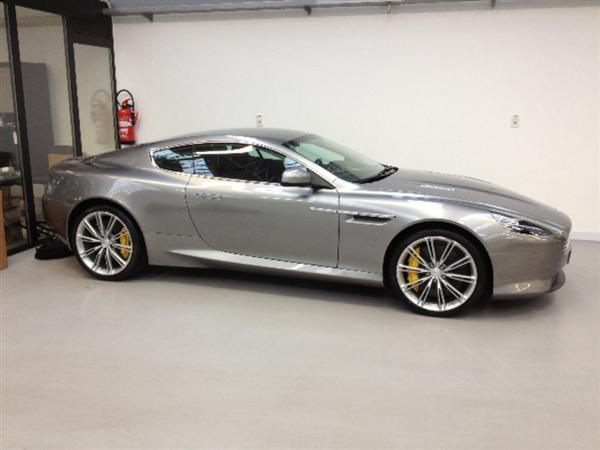

In [43]:
# Display some images from Aston Martin Virage Coupe 2012 car type
data_dir=pathlib.Path(TRAIN_DIR)
AstonMartinVirageCoupe = list(data_dir.glob('Aston Martin Virage Coupe 2012/*.jpg'))
print(str(AstonMartinVirageCoupe))
PIL.Image.open(str(AstonMartinVirageCoupe[0]))

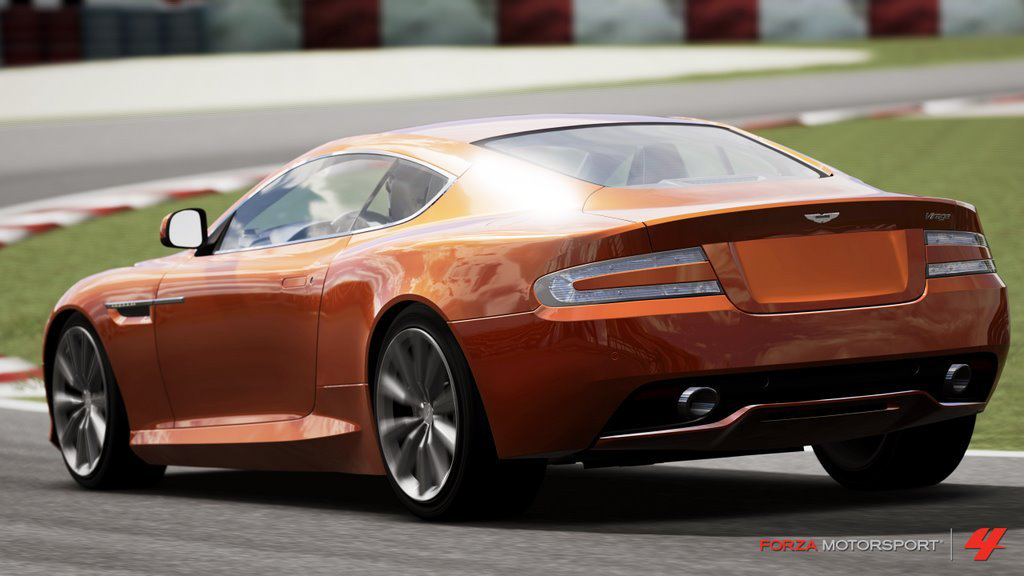

In [44]:
PIL.Image.open(str(AstonMartinVirageCoupe[1]))

In [55]:
# print number of Classes in Training set
num_classes=len(os.listdir(TRAIN_DIR))
print(f"The Total number of classes to predict is {num_classes}")  

The Total number of classes to predict is 196


Source https://keras.io/api/applications/resnet/

Each Keras Application expects a specific kind of input preprocessing. 
For ResNet,we need to call tf.keras.applications.resnet.preprocess_input on inputs before passing them to the model.
resnet.preprocess_input will convert the input images from RGB to BGR, then will zero-center each color channel with respect to the ImageNet dataset, without scaling.

Step 4) We will carry out the data augmentation such as random horizontal flipping or small random rotations or zoom. This helps model to learn different aspects of the training data while also controlling the problem of overfitting.

Training set - It is used to train the model i.e. compute the loss and adjust the weights of the model using gradient descent.

Validation set - It is used to evaluate the model while training, adjust hyperparameters (learning rate etc.) and pick the best version of the model.

Test set - Test data is used compare different models, or different types of modeling approaches, and report the final accuracy of the model.

In [73]:
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
# Create Image Generator and prepare an iterator for each dataset and save the augmented images (Only for training data) in a separate folder
path_augmented = '/content/drive/MyDrive/StanfordCarsDataset/ResnetAugmented'

# Check whether the specified path exists or not
isExist = os.path.exists(path_augmented)
print(isExist)
if not isExist: 
  # Create a new directory because it does not exist 
  os.makedirs(path_augmented)
  print("The new directory is created!")
else :
  imagelist= glob.glob(os.path.join(path_augmented, "*"))
  for f in imagelist:
    os.remove(f)

train_batches = ImageDataGenerator(preprocessing_function=preprocess_input,
                                              horizontal_flip = True,
                                              width_shift_range = 0.2,
                                              height_shift_range = 0.2,
                                              zoom_range = 0.4).flow_from_directory(
                                              save_to_dir=path_augmented,
                                              save_prefix='ResnetAugmented', 
                                              save_format='jpg',
                                              seed=123,
                                              directory=TRAIN_DIR, 
                                              target_size=(IMG_WIDTH,IMG_HEIGHT),
                                              class_mode='categorical', 
                                              batch_size=BATCH_SIZE)
"""
valid_batches = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory
                                              (directory=VALID_DIR,
                                               target_size=(IMG_WIDTH,IMG_HEIGHT), 
                                               class_mode='categorical', 
                                               batch_size=BATCH_SIZE)
"""
test_batches = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
                                                  directory=TEST_DIR,
                                                  target_size=(IMG_WIDTH,IMG_HEIGHT), 
                                                  class_mode='categorical',
                                                  batch_size=10, 
                                                  )

#Print number of augmented images created 
augmented_images_created=len(os.listdir(path_augmented))
augmented_images_created

True
Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


0

Plotting images generated by augmentation

In [24]:
# https://gac6.medium.com/visualizing-data-augmentations-from-keras-image-data-generator-44f040aa4c9f

plt.figure(figsize=(16, 16))
#Plots our figures
for i in range(1,17):
   plt.subplot(4, 4, i)
   batch = train_batches.next()
   image_ = batch[0].astype("uint8")
   plt.imshow(image_)
plt.show()

SyntaxError: ignored

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


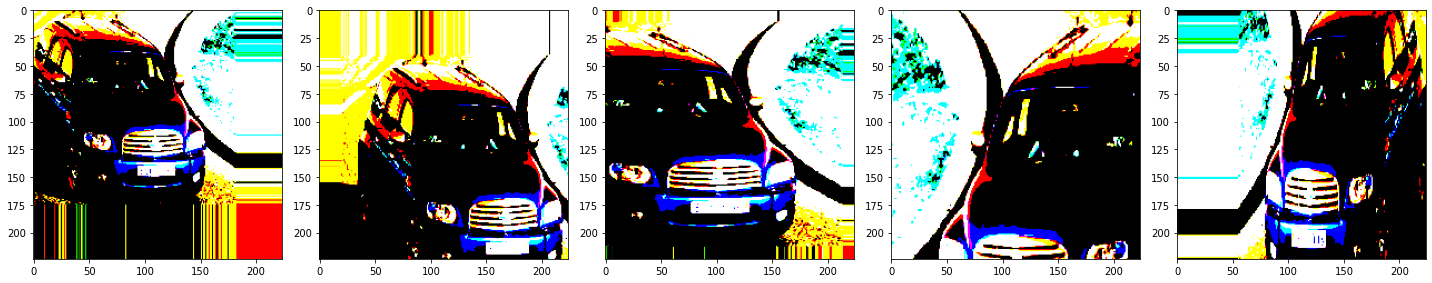

In [10]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
    
augmented_images = [train_batches[0][0][0] for i in range(5)]
plotImages(augmented_images)

Step 5) Instantiate a base model and load pre-trained weights into it.


The main idea behind transfer learning for deep learning models is that the first layers of a network are used to 
extract important high-level features,which remain similar for the kind of data treated. 
The final layers (also known as the head) of the original network are replaced by a custom head suitable for the problem at hand.

So  in below code , we will not train the initial layers of the model (will use initial layers as they are) and will train the custom made last layers of the model.

In [11]:
"""
Arguments Explaination (taken from https://keras.io/api/applications/resnet/)
include_top: whether to include the fully-connected layer at the top of the network.
weights: one of None (random initialization), 'imagenet' (pre-training on ImageNet), or the path to the weights file to be loaded.
input_tensor: optional Keras tensor (i.e. output of layers.Input()) to use as image input for the model.
input_shape: optional shape tuple, only to be specified if include_top is False (otherwise the input shape has to be (224, 224, 3) (with 'channels_last' data format) or (3, 224, 224) (with 'channels_first' data format). It should have exactly 3 inputs channels, and width and height should be no smaller than 32. E.g. (200, 200, 3) would be one valid value.
pooling: Optional pooling mode for feature extraction when include_top is False.max means that global max pooling will be applied.
classes: optional number of classes to classify images into, only to be specified if include_top is True, and if no weights argument is specified.
"""
# Instantiates the ResNet50 architecture
resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT,IMG_WIDTH,3),pooling='max')
output = resnet.layers[-1].output
output = tf.keras.layers.Flatten()(output)
resnet = Model(resnet.input, output)


94781440/94765736 [==============================] - 1s 0us/step


Step 6) Freeze all layers in the base model by setting trainable = False.

In [ ]:
for layer in resnet.layers:
    layer.trainable = False
    


In [ ]:
print(resnet.summary())

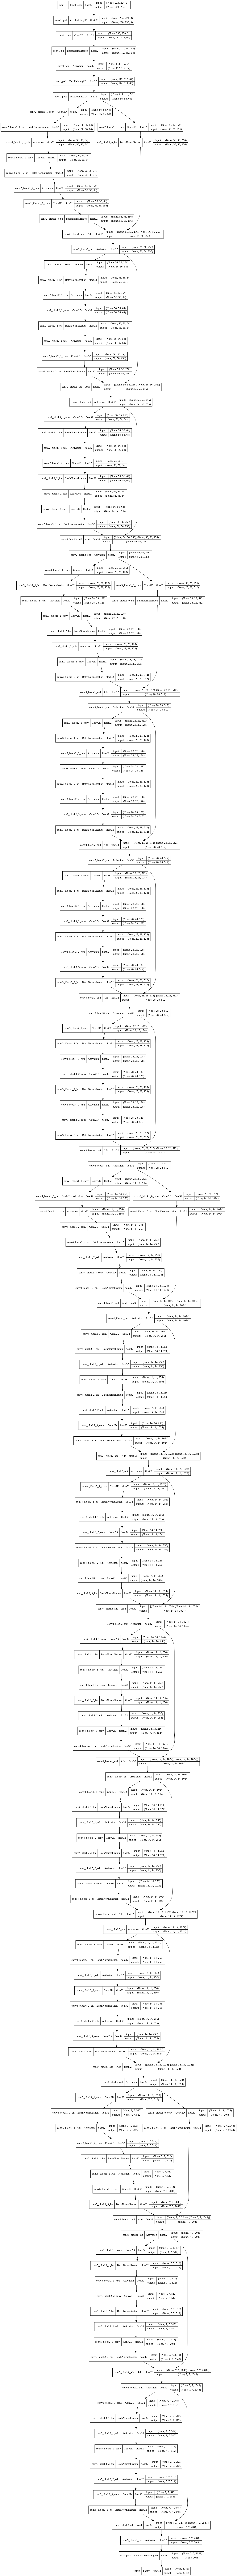

In [14]:
# Plotting the pre-traiend Resnet model https://keras.io/api/utils/model_plotting_utils/
tf.keras.utils.plot_model(
    resnet,
    to_file="resnetarchitecture.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    dpi=96,
    show_layer_activations=False,
)

Step 7) Create a new model on top of the output of one (or several) layers from the base model.

In [15]:
model = Sequential()
model.add(resnet)
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax')) # We define the number of neurons in the last layer as the number of classes
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 196)               200900    
                                                                 
Total params: 26,936,388
Trainable params: 3,348,676
Non

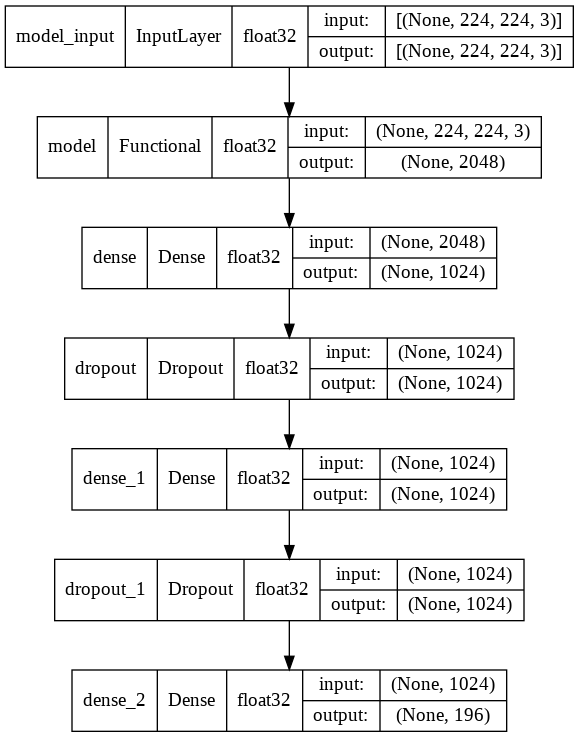

In [17]:
# Plotting the model. https://keras.io/api/utils/model_plotting_utils/
tf.keras.utils.plot_model(
    model,
    to_file="Resnet50model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    dpi=96,
    show_layer_activations=False,
)

In [22]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics=['accuracy'])

Step 8) Training the model

In [20]:
from pathlib import Path
total_train=0   # Count the number of images in training folder

for path in Path(TRAIN_DIR).iterdir():
    if path.is_dir():
        total_train+=len(os.listdir(path))

total_valid=0

for path in Path(TEST_DIR).iterdir():
    if path.is_dir():
        total_valid+=len(os.listdir(path))

print(f"The number of images in training folder are {total_train}")
print(f"The number of images in validation folder are {total_valid}")

The number of images in training folder are 8144
The number of images in validation folder are 8041


In [ ]:
# Stop training when a monitored metric has stopped improving using Callbacks
# Source https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

"""
Assuming the goal of a training is to minimize the loss. 
With this, the metric to be monitored would be 'loss', and mode would be 'min'.
A model.fit() training loop will check at end of every epoch whether the loss is no longer decreasing, 
considering the min_delta and patience if applicable.
Once it's found no longer decreasing, model.stop_training is marked True and the training terminates.
"""
history=model.fit(train_batches,
                  steps_per_epoch=total_train // BATCH_SIZE,
                  epochs = 100,
                  callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8,
                                              restore_best_weights=False),
                  validation_steps=total_valid // BATCH_SIZE,
                  validation_data = test_batches,verbose=1
                  )

Plotting the Train and Validation Data Accuracy / Loss

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Resnet50 Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch #')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch #')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")


In [ ]:
test_images,test_labels= next(test_batches)

Building the Confusion matrix

In [ ]:
print('Test batches classes ')
print(test_batches.classes)

predictions=model.predict(verbose=0,x=test_batches)
print('Rounded predictions ')
print(np.round(predictions))

cm=confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
print(test_batches.class_indices)


cm_plot_labels = class_names
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

Saving the model for prediction on Web Interface

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
save_path = '/content/gdrive/MyDrive/StanfordCarsDataset/Models'
tf.keras.models.save_model("ResNet50.h5",save_path)